# Unconstrained Scalar Optimization

One of the problems studied in introductory calculus courses is the minimization or maximization of a function of a single variable. That is, given a function $f(x)$, find values $x^*$ such that $f(x^*) \leq f(x)$, or $f(x^*) \geq f(x)$, for all $x$ in an interval containing $x^*$. Such points are called local optima. If the derivative exists at all points in a given interval, then the local optima are found by solving for values $x^*$ that satisfy

\begin{align}
f'(x^*) = 0
\end{align}

Let's see how we can put this to work in a process engineering context.

## Example: Reactor for a Series Reaction

A desired product $B$ is produced as intermediate in a series reaction

\begin{align}
A \overset{k_A}{\longrightarrow} B \overset{k_B}{\longrightarrow} C
\end{align}

where $A$ is a raw material and $C$ is a undesired by-product. The reaction operates at temperature where the rate constants are $k_A = 0.5\ \mbox{min}^{-1}$ and $k_A = 0.1\ \mbox{min}^{-1}$. The raw material is available as solution with a concenration $$C_{A,f} = 2.0\ \mbox{moles/liter}$.

A 100 liter tank is avialable to run the reaction. 

1. If the goal is obtain the maximum possible concentration of $B$, and the tank is operated as a continuous stirred tank reactor, what should be the flowrate? 

2. What is the production rate of $B$ at maximum concentration?

3. [Bonus] Would it be better to operate the tank as a batch reactor?

## Continuous Stirred Tank Reactor

The reaction dynamics for an isothermal continuous stirred tank reactor with a volume $V = 40$ liters and feed concentration $C_{A,f}$ are modeled as

\begin{align}
V\frac{dC_A}{dt} & = q(C_{A,f} - C_A) - V k_A C_A \\
V\frac{dC_B}{dt} & = - q C_B + V k_A C_A - V k_B C_B
\end{align}

At steady-state the material balances become

\begin{align}
0 & = q(C_{A,f} - \bar{C}_A) - V k_A \bar{C}_A \\
0 & = - q \bar{C}_B + V k_A \bar{C}_A - V k_B \bar{C}_B 
\end{align}

which can be solved for $C_A$

\begin{align}
\bar{C}_A & = \frac{qC_{A,f}}{q + Vk_A} \\
\end{align}

and then for $C_B$

\begin{align}
\bar{C}_B & = \frac{q V k_A C_{A,f}}{(q + V k_A)(q + Vk_B)}
\end{align}

The numerator is first-order in flowrate $q$, and the denominator is quadratic.  This is consistent with an intermediate value of $q$ corresponding to a maximum concentration $\bar{C}_B$. 

The next cell plots $\bar{C}_B$ as a function of flowrate $q$.

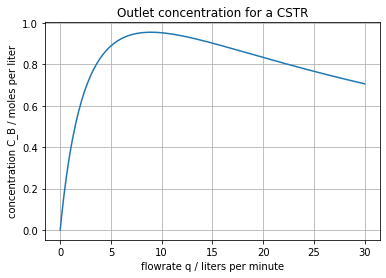

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

def cstr(q):
    return q*V*kA*CAf/(q + V*kB)/(q + V*kA)

q = np.linspace(0,30,200)
plt.plot(q, cstr(q))
plt.xlabel('flowrate q / liters per minute')
plt.ylabel('concentration C_B / moles per liter')
plt.title('Outlet concentration for a CSTR')
plt.grid()

We see that, for the parameters given, there is an optimal flowrate somewhere between 5 and 10 liters per minute.

## Analytical Solution using Calculus

As it happens, this problem has an interesting analytical solution that can be found by hand, and which can be used to check the accuracy of numerical solutions. Setting the first derivative of $\bar{C}_B$ to zero,

\begin{align}
\left.\frac{d\bar{C}_B}{dq}\right|_{q^*} = \frac{V k_A C_{A,f}}{(q^* + V k_A)(q^* + Vk_B)} - \frac{q^* V k_A C_{A,f}}{(q^* + V k_A)^2(q^* + Vk_B)} - \frac{q^* V k_A C_{A,f}}{(q^* + V k_A)(q^* + Vk_B)^2} = 0
\end{align}

Clearing out the non-negative common factors yields

\begin{align}
1 - \frac{q^*}{(q^* + V k_A)} - \frac{q^*}{(q^* + Vk_B)} = 0
\end{align}

and multiplying by the non-negative denominators produces

\begin{align}
{q^*}^2 + q^*V(k_A + k_B) + V^2k_Ak_B - q^*(q^* + Vk_B) - q^*(q^* + Vk_A) = 0
\end{align}

Expanding these expressions followed by arithmetic cancelations gives the final result

\begin{align}
q^*  =  V\sqrt{k_Ak_B}
\end{align}

which shows the optimal dilution rate, $\frac{q^*}{V}$, is equal the geomtric mean of the rate constants.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

qmax = V*np.sqrt(kA*kB)
CBmax = cstr(qmax)
print('Flowrate at maximum CB = ', qmax, 'liters per minute.')
print('Maximum CB =', CBmax, 'moles per liter.')
print('Productivity = ', qmax*CBmax, 'moles per minute.')

Flowrate at maximum CB =  8.94427190999916 liters per minute.
Maximum CB = 0.9549150281252629 moles per liter.
Productivity =  8.541019662496845 moles per minute.


## Numerical Solution using `scipy.minimize_scalar`

In many applications, a simple analysis leading to an analytical solution is either difficult or intractable. In these cases, numerical solution solution is the only choice for calculating a solution to the optimization problem.

The following cell demonstrates the use of the `scipy` optimization library. The  value of $q$ that maximizes $\bar{C}_B$ can be found using the function `scipy.minimize_scalar`. Note the change in sign needed to convert the  `cstr` function from a maximization to a minimization problem for use with `minimize_scalar`.

In [3]:
from scipy.optimize import minimize_scalar

V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

def cstr(q):
    return -q*V*kA*CAf/(q + V*kB)/(q + V*kA)

results = minimize_scalar(cstr, bracket=[0,50])
results

     fun: -0.9549150281252629
    nfev: 18
     nit: 14
 success: True
       x: 8.944272016904383

The following cell shows how to access the components of the solution obtained from `scipy.minimize_scalar`.

In [4]:
if results.success:
    qmax = results.x
    CBmax = -results.fun
    print('Flowrate at maximum CB = ', qmax, 'liters per minute.')
    print('Maximum CB =', CBmax, 'moles per liter.')
    print('Productivity = ', qmax*CBmax, 'moles per minute.')
else:
    print('No solution found.')

Flowrate at maximum CB =  8.944272016904383 liters per minute.
Maximum CB = 0.9549150281252629 moles per liter.
Productivity =  8.54101976458225 moles per minute.


## [Bonus Discussion] Batch Reactor

A material balance for an isothermal stirred batch reactor with a volume $V = 40$ liters and an initial concentration $C_{A,f}$ is given by

\begin{align}
V\frac{dC_A}{dt} & = - V k_A C_A \\
V\frac{dC_B}{dt} & = - V k_A C_A - V k_B C_B
\end{align}

Eliminating the common factor $V$

\begin{align}
\frac{dC_A}{dt} & = - k_A C_A \\
\frac{dC_B}{dt} & = - k_A C_A - V k_B C_B
\end{align}

With an initial concentration $C_{A,f}$. A numerical solution to these equations is shown in the following cell.

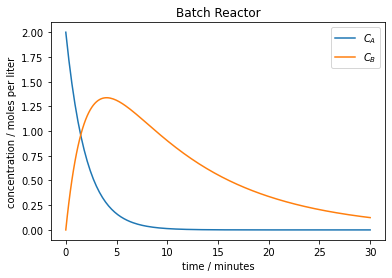

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

def batch(X, t):
    CA, CB = X
    dCA_dt = -kA*CA
    dCB_dt = kA*CA - kB*CB
    return [dCA_dt, dCB_dt]

t = np.linspace(0,30,200)
soln = odeint(batch, [CAf,0], t)
plt.plot(t, soln)
plt.xlabel('time / minutes')
plt.ylabel('concentration / moles per liter')
plt.title('Batch Reactor')
plt.legend(['$C_A$','$C_B$'])

To find the maximum value, we first write a function to compute $C_B$ for any value of time $t$.

In [6]:
def CB(t):
    soln = odeint(batch, [CAf, 0], [0, t])
    return soln[-1][1]

We gain use `minimize_scalar` to find the value of $t$ that minimizes the negative value of $C_B(t)$.|

In [7]:
from scipy.optimize import minimize_scalar
minimize_scalar(lambda t: -CB(t), bracket=[0,50])

     fun: -1.3374806339222158
    nfev: 23
     nit: 19
 success: True
       x: 4.023594924340666

In [8]:
tmax = minimize_scalar(lambda t: -CB(t), bracket=[0,50]).x

print('Concentration C_B has maximum', CB(tmax), 'moles/liter at time', tmax, 'minutes.')
print('Maximum productivity of the batch reactor is', V*CB(tmax)/tmax, 'moles per minute.')

Concentration C_B has maximum 1.3374806339222158 moles/liter at time 4.023594924340666 minutes.
Maximum productivity of the batch reactor is 13.296374601042967 moles per minute.
